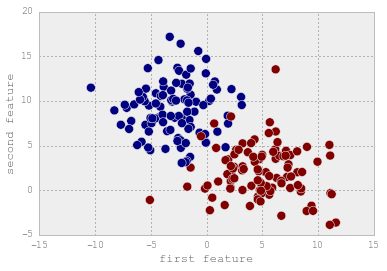

In [195]:
import pandas as pd
import numpy as np

data = pd.read_csv('data-logistic.csv', header=None)
X, y = data[[1, 2]], data[0]

%matplotlib inline
# pd.set_option('display.mpl_style', 'default')
# figsize(7, 7)


plt.scatter(X[1], X[2], c=y, s=80)
plt.xlabel("first feature")
plt.ylabel("second feature")


In [188]:
from math import exp

def delta_count(w1, w2, order):
    delta = 0
    for i in range(len(X)):
        exp_val = 1 + exp(-y[i]*(w1*X.ix[i, 1] + w2*X.ix[i, 2]))
        delta += y[i]*X.ix[i, order]*(1-1/exp_val)
    return delta


def one_step(w1, w2, k, C):
    w1_new = w1 + k*delta_count(w1, w2, 1)/len(X) - k*C*w1
    w2_new = w2 + k*delta_count(w1, w2, 2)/len(X) - k*C*w2
    return (w1_new, w2_new)


# ================== main ===============

diff = 1
iter = 0
k = 0.1
C = 10

w1, w2 = one_step(0, 0, k, C)

while diff > 0.00001:
    iter += 1
    w1_new, w2_new = one_step(w1, w2, k, C)
    diff = numpy.linalg.norm(np.array([w1, w2])-np.array([w1_new, w2_new]))    
    w1, w2 = w1_new, w2_new
    
print(w1, w2, iter)

# no reg
# w1 = 0.76209484303 
# w2 = 0.54029099778
                  

0.0846839124197 0.0363387198158 11


In [194]:
# no reg
# W = np.array([0.76209484303, 0.54029099778])

# with reg
W = np.array([0.0846839124197, 0.0363387198158 ])

def predict(i):
    return 1/(1 + np.exp(-np.dot(W, np.array(X.ix[i,:])))) 
    
# numpy.array(W)
# predict(7)

X['prob'] = 1 / (1 + np.exp(-np.dot(np.array(X[[1,2]]), W)))

# X['targ'] = X['prob'].map(lambda x: 0 if x < 0.5 else 1)

# X.head()

from sklearn.metrics import roc_auc_score

roc_auc_score(y, X['prob'])

# no reg - 0.719
# with reg - 0.861


0.86099999999999999